1.INTRODUTION: 

This project uses machine learning to predict whether a person is likely to develop diabetes based on features such as glucose level, BMI, age, and more.

2. IMPORT LIBRARIES

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import *

3. LOAD DATASET

In [95]:
d=pd.read_csv("weather_forecast_data.csv")

4. DATA EXPLORATION

In [97]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


In [98]:
d.duplicated().sum()

0

In [99]:
d.isna().sum().sum()

0

In [100]:
d

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,no rain
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,no rain
2497,28.108274,43.817178,2.897128,75.842952,999.119187,no rain
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,no rain


5. DATA VISUALIZATION

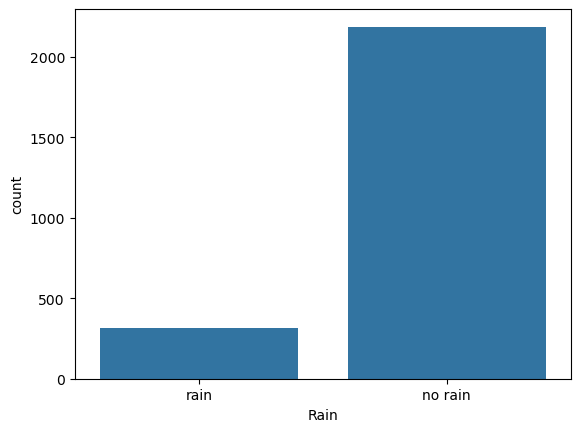

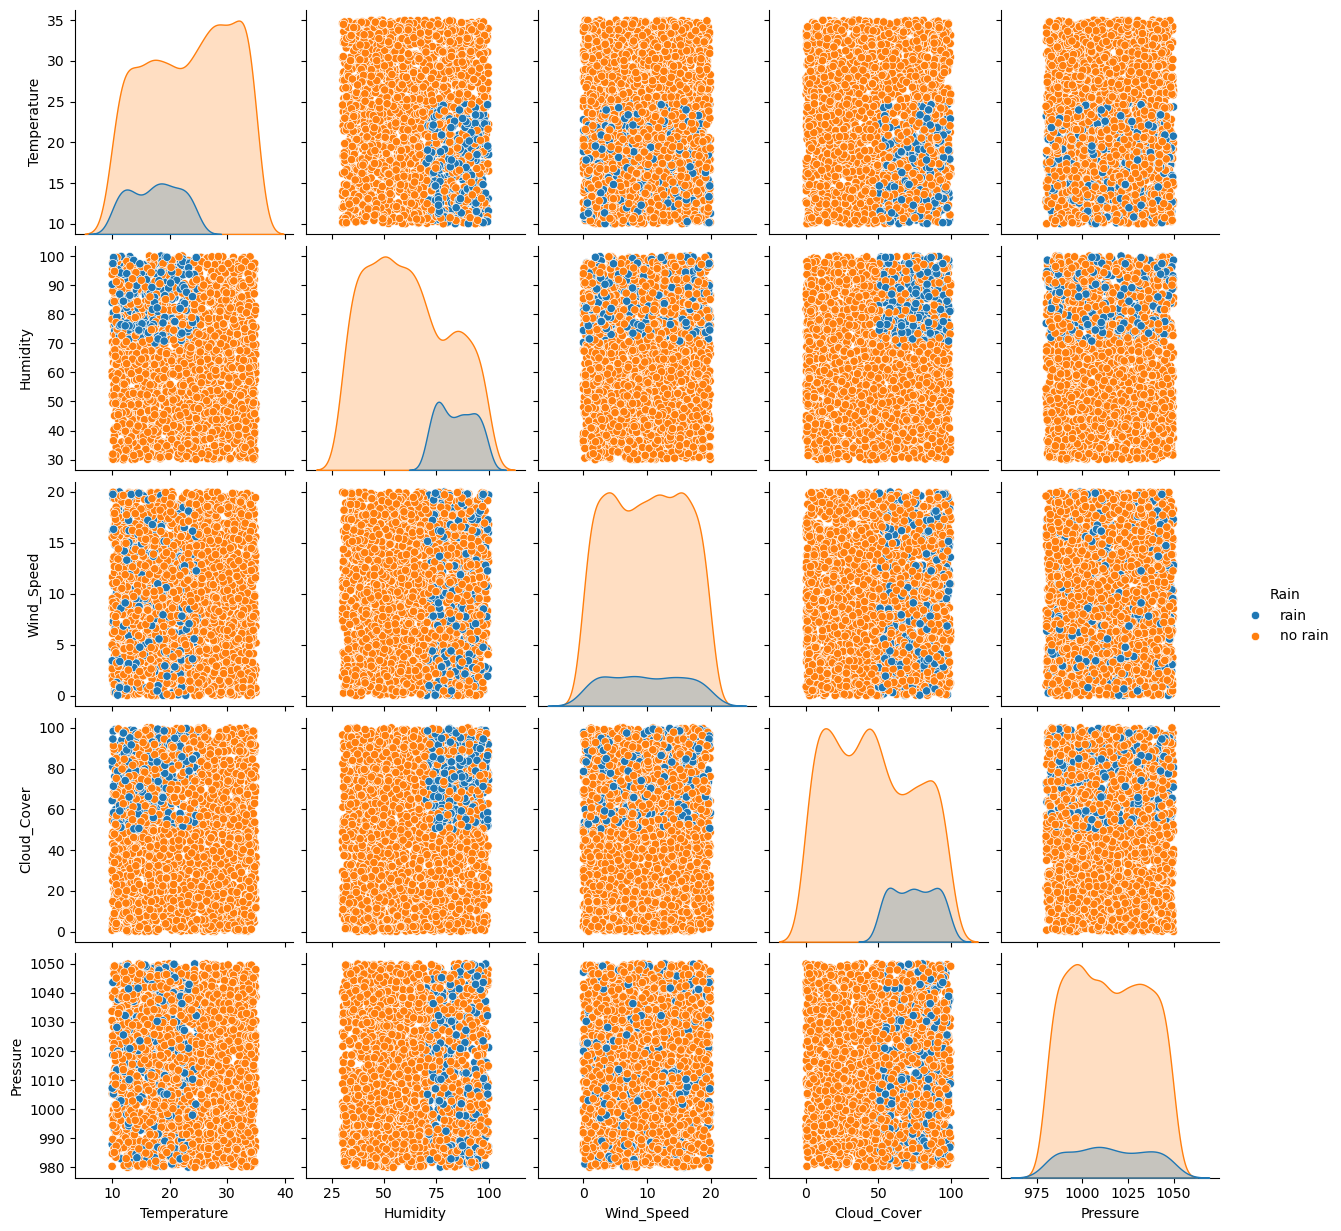

In [102]:
sns.countplot(x='Rain', data=d)
sns.pairplot(d, hue='Rain')
plt.show()

6. DATA PREPROCESSING

In [104]:
le=LabelEncoder()

In [105]:
d['Rain']=le.fit_transform(d['Rain'])

In [106]:
d

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,0
...,...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181,0
2496,27.558479,46.481744,10.884915,39.715133,1008.590961,0
2497,28.108274,43.817178,2.897128,75.842952,999.119187,0
2498,14.789275,57.908105,2.374717,2.378743,1046.501875,0


In [107]:
x=d.iloc[:,:5]
y=d.iloc[:,-1]
x

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
0,23.720338,89.592641,7.335604,50.501694,1032.378759
1,27.879734,46.489704,5.952484,4.990053,992.614190
2,25.069084,83.072843,1.371992,14.855784,1007.231620
3,23.622080,74.367758,7.050551,67.255282,982.632013
4,20.591370,96.858822,4.643921,47.676444,980.825142
...,...,...,...,...,...
2495,21.791602,45.270902,11.807192,55.044682,1017.686181
2496,27.558479,46.481744,10.884915,39.715133,1008.590961
2497,28.108274,43.817178,2.897128,75.842952,999.119187
2498,14.789275,57.908105,2.374717,2.378743,1046.501875


7. TRAIN-TEST SPLIT

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2)


8. MODEL TRAINING

In [111]:
dt=DecisionTreeClassifier()

In [112]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

9. EVOLUTION

In [114]:
ypred=dt.predict(x_test)
print("accuracy score : ",accuracy_score(y_test,ypred)*100)

accuracy score :  100.0


10. CONFUSION MATRIX

In [116]:
confusion_matrix(y_test,ypred)

array([[444,   0],
       [  0,  56]], dtype=int64)

11. VISUALIZING DECISION TREE

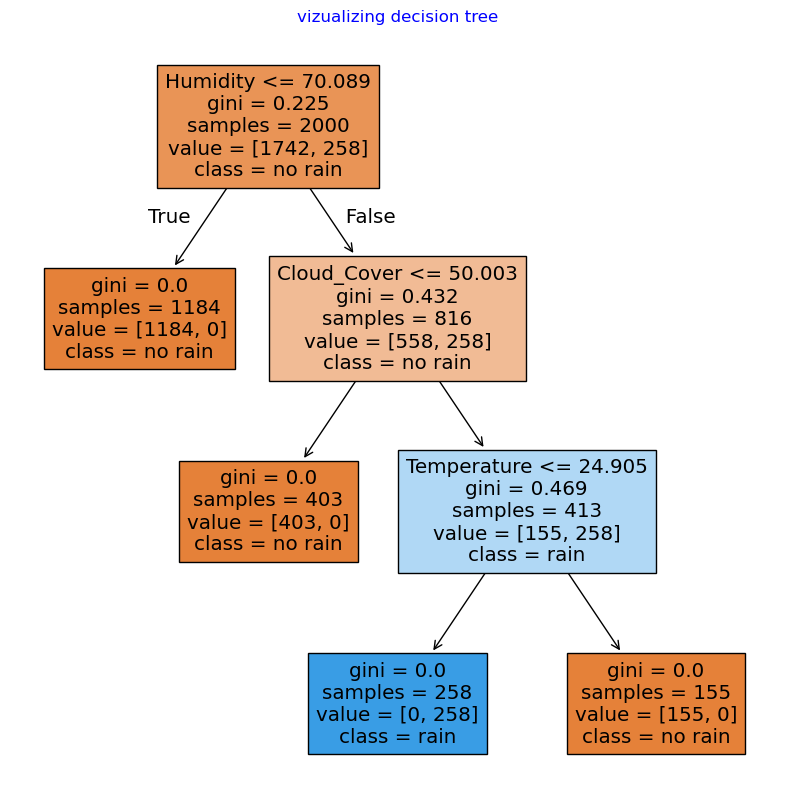

In [136]:
plt.figure(figsize=(10,10))
plot_tree(dt,filled=True,feature_names=x.columns,class_names=['no rain','rain'])
plt.title("vizualizing decision tree",color='b')
plt.show()